<a href="https://colab.research.google.com/github/ShreyasCode1223/Outrix_Tasks/blob/main/HPP_Outrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset. Make sure you have uploaded train.csv to your Colab session.
try:
    df_house = pd.read_csv('train.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'train.csv' was not found.")
    print("Please upload the file to your Google Colab session.")
    exit()

print("\nFirst 5 rows of the dataset:")
print(df_house.head())

Dataset loaded successfully!

First 5 rows of the dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold 

In [ ]:
# Select key numerical features and the target variable
features = ['GrLivArea', 'GarageArea', 'OverallQual']
target = 'SalePrice'

# Handle any missing values in the selected features by filling with 0
df_house[features] = df_house[features].fillna(0)

# Separate features (X) and target (y)
X = df_house[features]
y = df_house[target]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (1168, 3)
Testing data shape: (292, 3)


In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

print("\nModel training complete.")


Model training complete.



Root Mean Squared Error (RMSE): $42,583.43


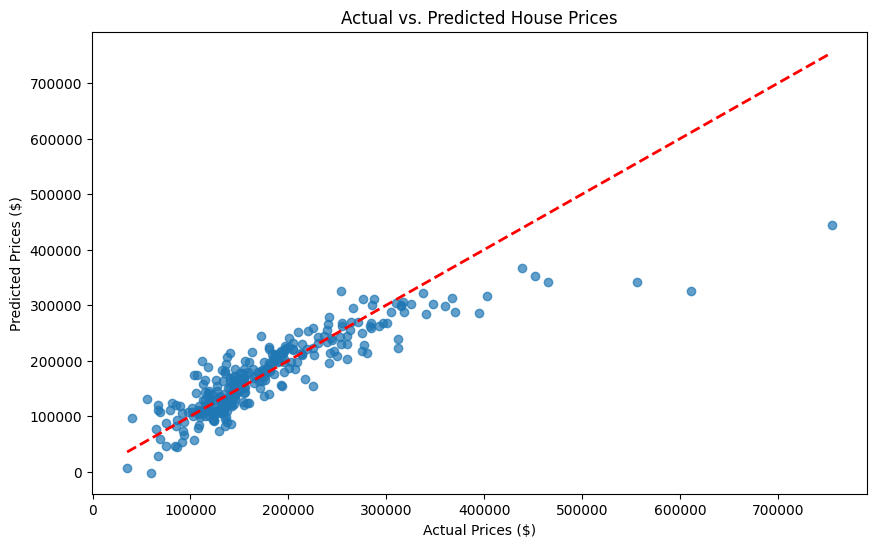

In [ ]:
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nRoot Mean Squared Error (RMSE): ${rmse:,.2f}")

# Plot a graph to compare Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.title('Actual vs. Predicted House Prices')
plt.show()